In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="darkgrid")
plt.rc('font', family='Malgun Gothic')

In [2]:
path = './다목적댐 운영정보'
df = None
for file_name in os.listdir(path):
    csv_path = os.path.join(path, file_name)
    temp = pd.read_csv(csv_path)
    if df is None:
        df = temp
    else:
        df = df.append(temp)
      
df = df.reset_index(drop=True)
df

,dam_nm,msmt_tm,rsvr_wal_hg,rain_qy,inflow_qy,tot_dcwtr_qy,rsvwt_qy,dam_rsvwt_rt
0,주암(본),201912092400,105.90,0.0,11.288,11.180,349.339,76.4
1,주암(본),201912092400,105.90,0.0,11.288,11.180,349.339,76.4
2,주암(본),201912092400,105.90,0.0,11.288,11.180,349.339,76.4
3,주암(본),201912092400,105.90,0.0,11.288,11.180,349.339,76.4
4,주암(본),201912092400,105.90,0.0,11.288,11.180,349.339,76.4
...,...,...,...,...,...,...,...,...
12658448,소양강,202008312330,186.06,0.0,0.000,209.858,2048.651,70.6
12658449,소양강,202008312330,186.06,0.0,0.000,209.858,2048.651,70.6
12658450,소양강,202008312330,186.06,0.0,0.000,209.858,2048.651,70.6
12658451,소양강,202008312330,186.06,0.0,0.000,209.858,2048.651,70.6


In [3]:
df2 = df.drop_duplicates(subset=['dam_nm']).reset_index()
df2.loc[:,'capacity'] = df2['dam_rsvwt_rt'].values * df2['rsvwt_qy'].values
df2

,index,dam_nm,msmt_tm,rsvr_wal_hg,rain_qy,inflow_qy,tot_dcwtr_qy,rsvwt_qy,dam_rsvwt_rt,capacity
0,0,주암(본),201912092400,105.90,0.0,11.288,11.180,349.339,76.4,26689.4996
1,20736,군위,201912092400,195.36,0.0,1.032,1.032,28.006,57.5,1610.3450
2,25920,충주,201912092400,135.58,0.0,0.000,0.000,1804.171,65.6,118353.6176
3,119232,밀양,201912092400,203.89,0.0,1.607,1.614,63.311,86.0,5444.7460
4,127008,대청,201912092400,75.40,0.0,354.794,10.536,1100.959,73.9,81360.8701
5,171072,횡성,201912092400,176.75,0.0,1.650,1.647,68.718,79.1,5435.5938
6,178848,남강,201912092400,41.07,0.0,166.271,10.549,184.363,59.6,10988.0348
7,233280,합천,201912092400,175.19,0.0,0.000,0.000,704.366,89.2,62829.4472
8,248832,섬진강,201912092400,189.66,0.0,4.020,4.020,275.462,59.1,16279.8042
9,259200,김천부항,201912092400,192.93,0.0,1.620,1.621,43.200,79.6,3438.7200


Text(0, 0.5, '저수용량')

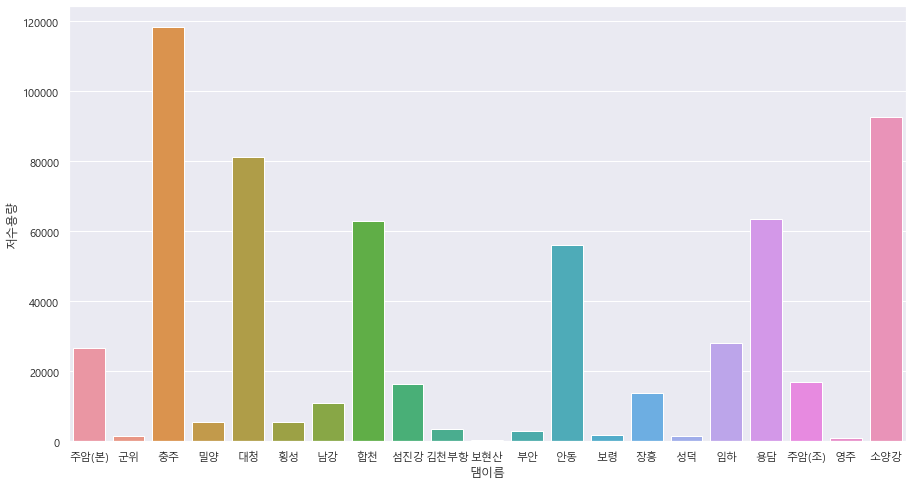

In [4]:
plt.figure(figsize=(15,8))
sns.barplot(x='dam_nm', y="capacity", data=df2)
plt.xlabel('댐이름')
plt.ylabel('저수용량')

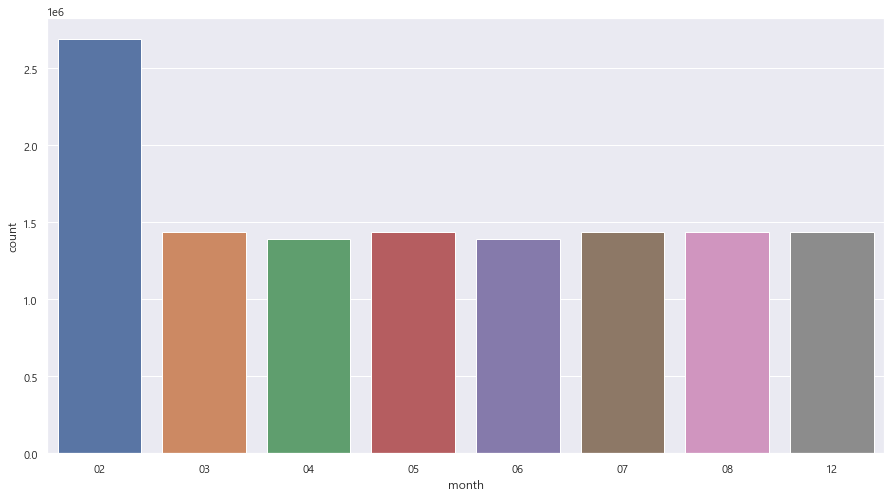

In [5]:
df['month'] = df['msmt_tm'].apply(lambda x: str(x)[4:6])
plt.figure(figsize=(15,8))
sns.countplot(x="month", data=df)

In [6]:
df = df.drop_duplicates().reset_index(drop=True)
df

,dam_nm,msmt_tm,rsvr_wal_hg,rain_qy,inflow_qy,tot_dcwtr_qy,rsvwt_qy,dam_rsvwt_rt,month
0,주암(본),201912092400,105.90,0.0,11.288,11.180,349.339,76.4,12
1,주암(본),201912092400,105.90,0.0,11.289,11.289,349.339,76.4,12
2,주암(본),201912092350,105.90,0.0,11.602,11.210,349.339,76.4,12
3,주암(본),201912092340,105.90,0.0,11.919,11.474,349.339,76.4,12
4,주암(본),201912092330,105.90,0.0,12.146,12.123,349.339,76.4,12
...,...,...,...,...,...,...,...,...,...
1042885,소양강,202008312130,186.08,0.0,209.857,210.063,2049.735,70.7,08
1042886,소양강,202008312400,186.06,0.0,209.720,209.650,2048.651,70.6,08
1042887,소양강,202008312400,186.06,0.0,209.720,209.720,2048.651,70.6,08
1042888,소양강,202008312350,186.06,0.0,0.000,209.755,2048.651,70.6,08


Text(0, 0.5, '댐이름')

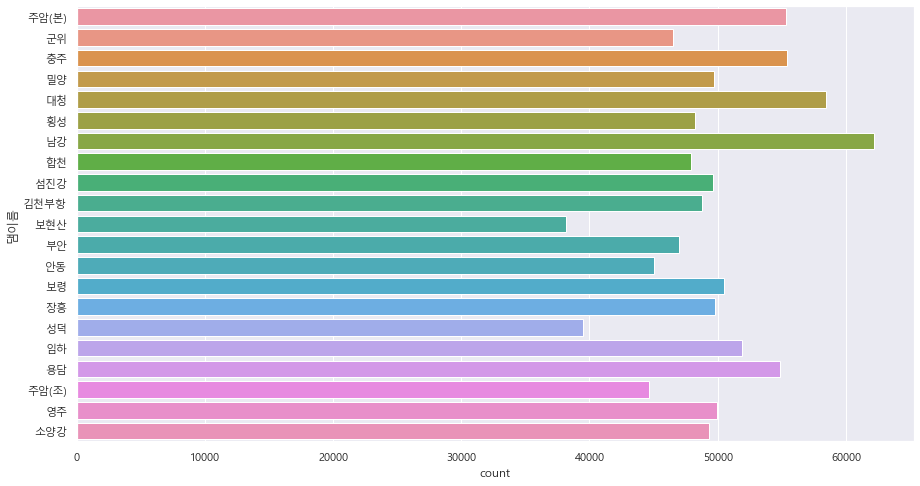

In [7]:
plt.figure(figsize=(15,8))
sns.countplot(y="dam_nm", data=df)
plt.ylabel('댐이름')

In [8]:
mean_df = df.groupby(['dam_nm']).mean()

Text(0.5, 1.0, '댐 별 평균 저수위')

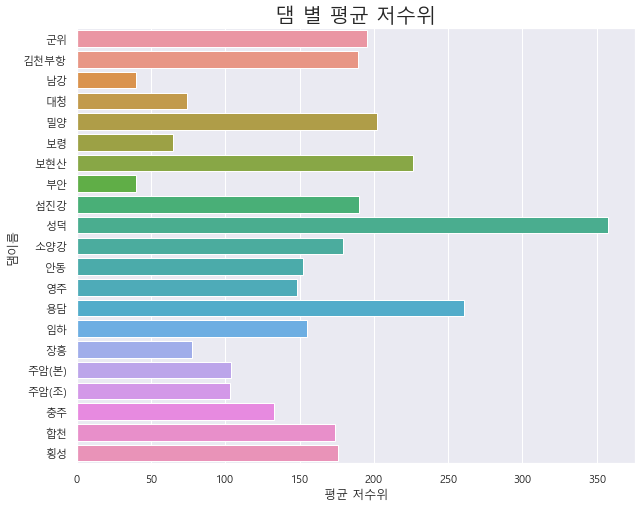

In [9]:
plt.figure(figsize=(10,8))
sns.barplot(x="rsvr_wal_hg", y=mean_df.index, data=mean_df)
plt.xlabel('평균 저수위')
plt.ylabel('댐이름')
plt.title('댐 별 평균 저수위', fontsize=20)

Text(0.5, 1.0, '댐 별 평균 강우량')

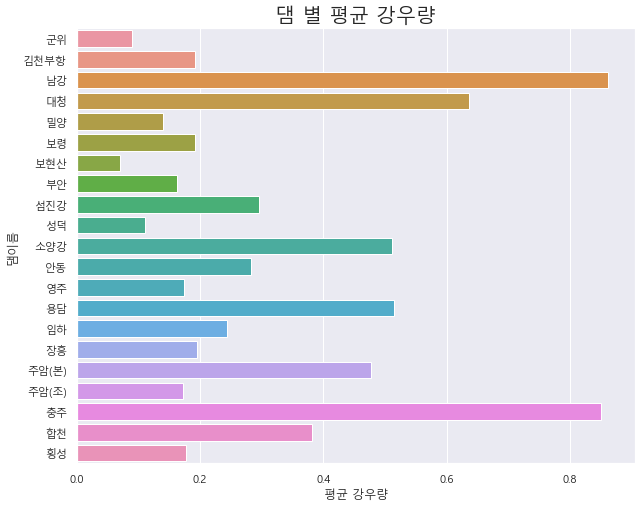

In [10]:
plt.figure(figsize=(10,8))
sns.barplot(x="rain_qy", y=mean_df.index, data=mean_df)
plt.xlabel('평균 강우량')
plt.ylabel('댐이름')
plt.title('댐 별 평균 강우량', fontsize=20)

Text(0.5, 1.0, '댐 별 평균 유입량')

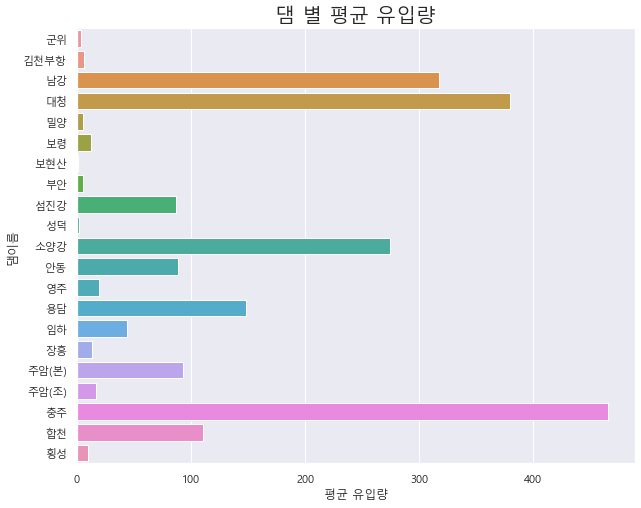

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(x="inflow_qy", y=mean_df.index, data=mean_df)
plt.xlabel('평균 유입량')
plt.ylabel('댐이름')
plt.title('댐 별 평균 유입량', fontsize=20)

Text(0.5, 1.0, '댐 별 평균 방류량')

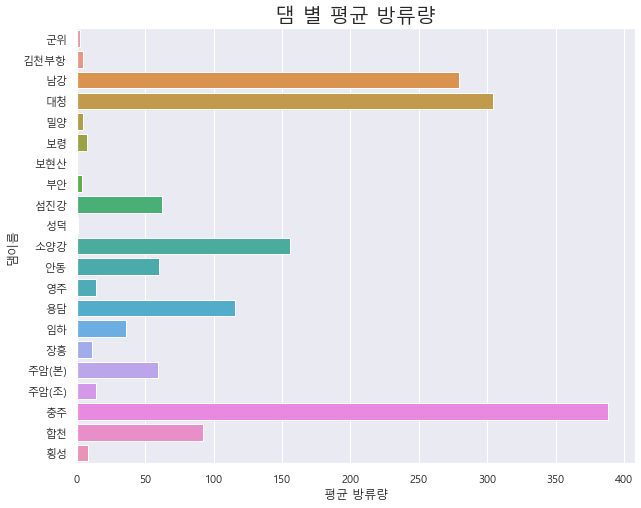

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(x="tot_dcwtr_qy", y=mean_df.index, data=mean_df)
plt.xlabel('평균 방류량')
plt.ylabel('댐이름')
plt.title('댐 별 평균 방류량', fontsize=20)

Text(0.5, 1.0, '댐 별 평균 저수량')

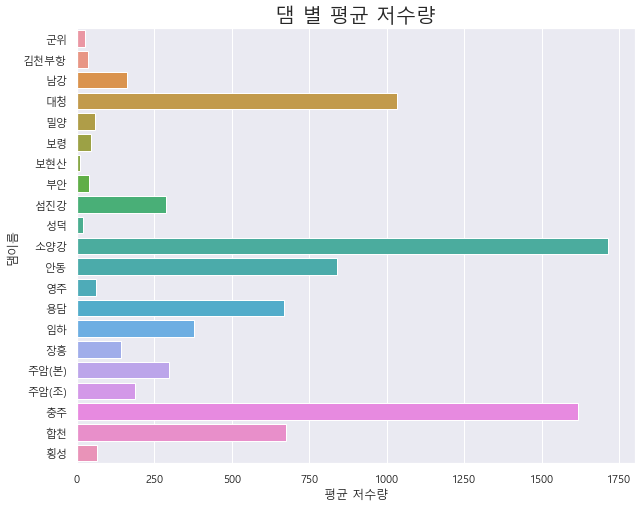

In [13]:
plt.figure(figsize=(10,8))
sns.barplot(x="rsvwt_qy", y=mean_df.index, data=mean_df)
plt.xlabel('평균 저수량')
plt.ylabel('댐이름')
plt.title('댐 별 평균 저수량', fontsize=20)

Text(0.5, 1.0, '댐 별 평균 저수율')

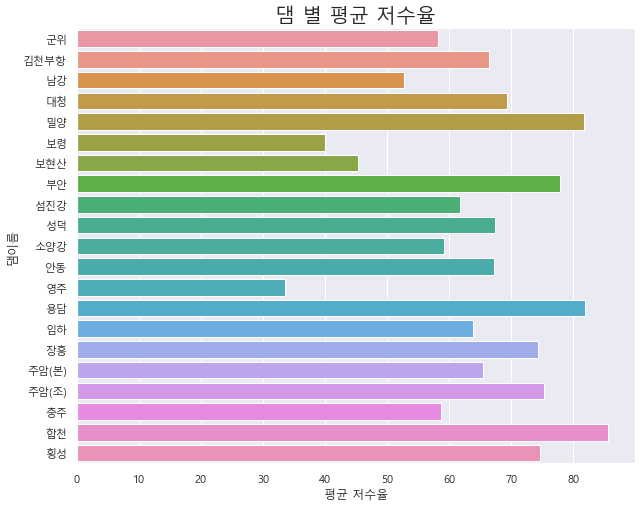

In [14]:
plt.figure(figsize=(10,8))
sns.barplot(x="dam_rsvwt_rt", y=mean_df.index, data=mean_df)
plt.xlabel('평균 저수율')
plt.ylabel('댐이름')
plt.title('댐 별 평균 저수율', fontsize=20)

In [15]:
df['month'] = df['msmt_tm'].apply(lambda x: str(x)[4:6])
mean_df = df.groupby(by=["month"]).mean()

Text(0.5, 1.0, '월 별 평균 저수위')

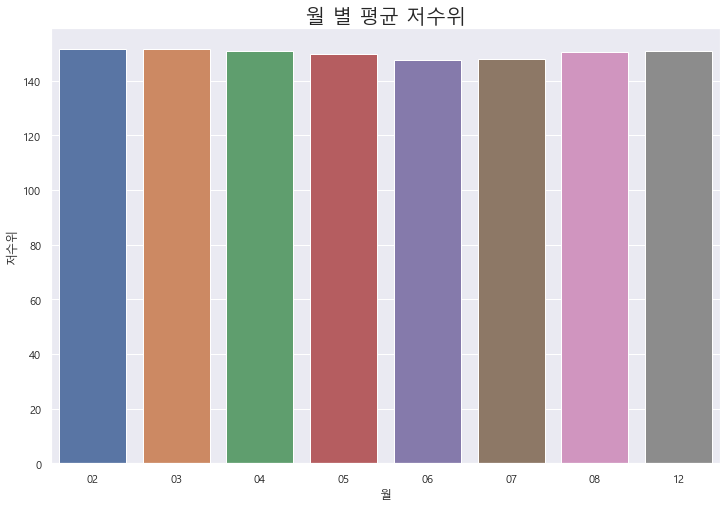

In [16]:
plt.figure(figsize=(12,8))
sns.barplot(x=mean_df.index, y='rsvr_wal_hg', data=mean_df)
plt.xlabel('월')
plt.ylabel('저수위')
plt.title('월 별 평균 저수위', fontsize=20)

Text(0.5, 1.0, '월 별 평균 강우량')

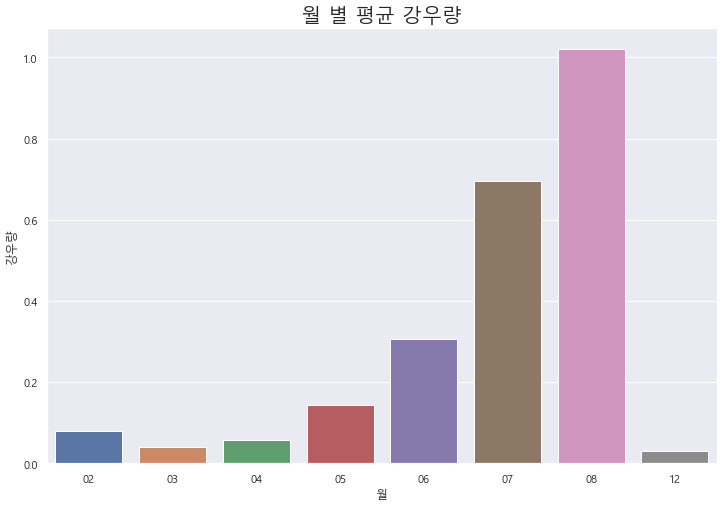

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(x=mean_df.index, y='rain_qy', data=mean_df)
plt.xlabel('월')
plt.ylabel('강우량')
plt.title('월 별 평균 강우량', fontsize=20)

Text(0.5, 1.0, '월 별 평균 유입량')

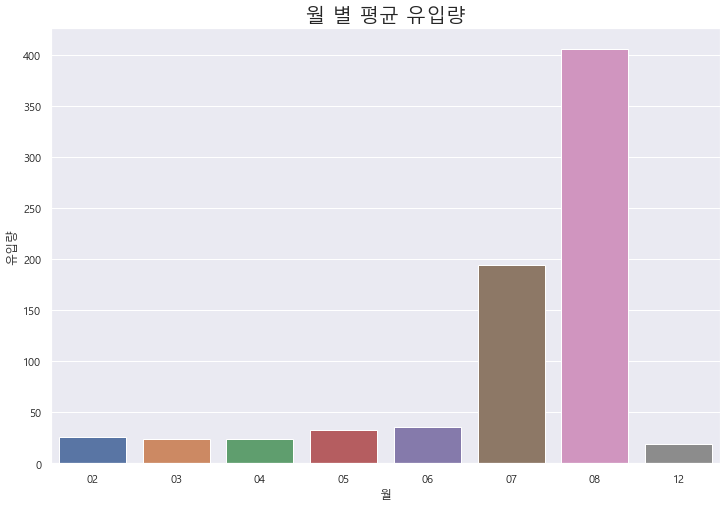

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(x=mean_df.index, y='inflow_qy', data=mean_df)
plt.xlabel('월')
plt.ylabel('유입량')
plt.title('월 별 평균 유입량', fontsize=20)

Text(0.5, 1.0, '월 별 평균 방류량')

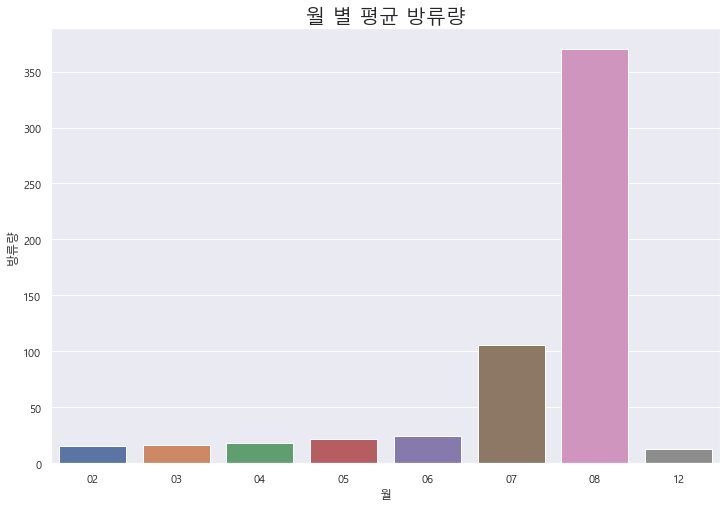

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(x=mean_df.index, y='tot_dcwtr_qy', data=mean_df)
plt.xlabel('월')
plt.ylabel('방류량')
plt.title('월 별 평균 방류량', fontsize=20)

Text(0.5, 1.0, '월 별 평균 저수량')

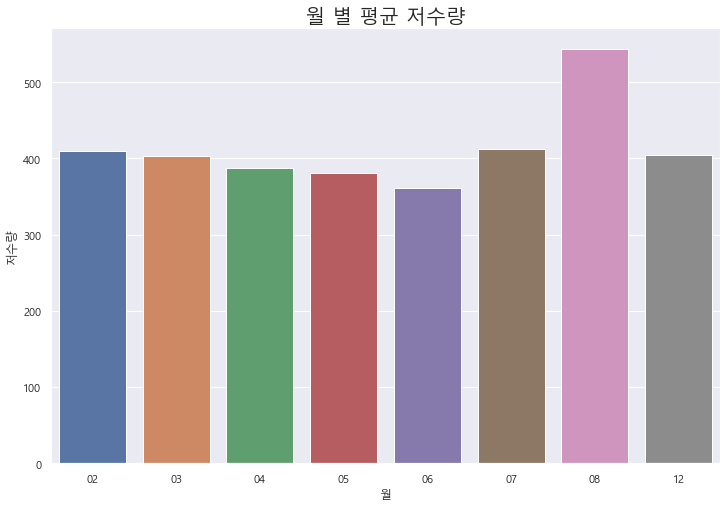

In [20]:
plt.figure(figsize=(12,8))
sns.barplot(x=mean_df.index, y='rsvwt_qy', data=mean_df)
plt.xlabel('월')
plt.ylabel('저수량')
plt.title('월 별 평균 저수량', fontsize=20)

Text(0.5, 1.0, '월 별 평균 저수율')

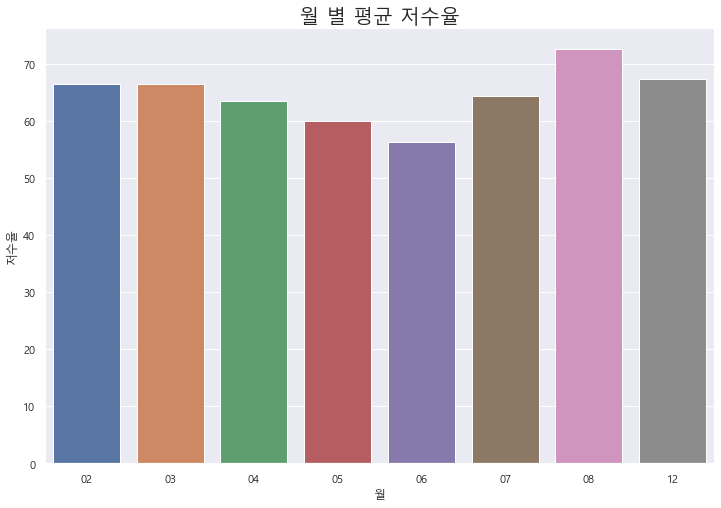

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(x=mean_df.index, y='dam_rsvwt_rt', data=mean_df)
plt.xlabel('월')
plt.ylabel('저수율')
plt.title('월 별 평균 저수율', fontsize=20)

In [22]:
mean_df = df.groupby(by=["month","dam_nm"]).agg('mean').reset_index()
mean_df

,month,dam_nm,msmt_tm,rsvr_wal_hg,rain_qy,inflow_qy,tot_dcwtr_qy,rsvwt_qy,dam_rsvwt_rt
0,02,군위,2.020022e+11,194.578911,0.035383,1.491749,0.727476,26.464519,54.348055
1,02,김천부항,2.020022e+11,190.510625,0.055875,1.920184,1.703704,38.105509,70.183112
2,02,남강,2.020022e+11,40.634433,0.149407,44.392900,40.328762,172.289360,55.716271
3,02,대청,2.020022e+11,75.666366,0.140774,87.961758,38.909284,1117.570740,74.996841
4,02,밀양,2.020022e+11,205.481313,0.073090,2.801670,1.628288,66.428242,90.265921
...,...,...,...,...,...,...,...,...,...
163,12,주암(본),2.019122e+11,105.689308,0.055573,22.762767,11.319899,344.310174,75.346322
164,12,주암(조),2.019122e+11,105.717781,0.022095,9.222157,8.154007,204.175625,81.677067
165,12,충주,2.019122e+11,135.224975,0.067348,106.916355,87.523514,1776.993686,64.622468
166,12,합천,2.019122e+11,175.183861,0.027738,11.222170,10.761609,704.223385,89.144483


Text(0.5, 1.0, '댐 별 저수위')

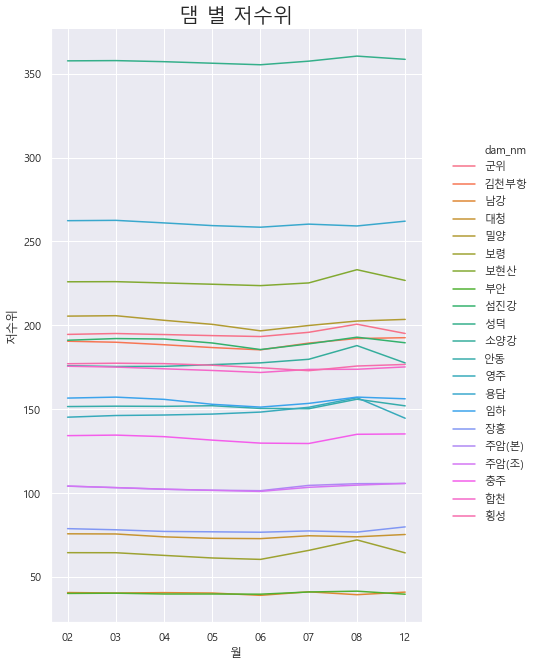

In [23]:
g = sns.relplot(data=mean_df, x="month", y="rsvr_wal_hg", hue="dam_nm", kind="line")
g.fig.set_figwidth(8)
g.fig.set_figheight(10)
plt.xlabel('월')
plt.ylabel('저수위')
plt.title('댐 별 저수위', fontsize=20)

Text(0.5, 1.0, '댐 별 강우량')

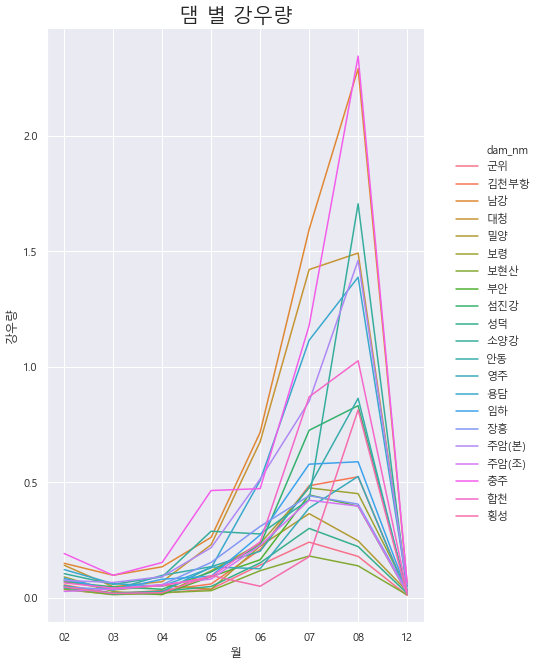

In [24]:
g = sns.relplot(data=mean_df, x="month", y="rain_qy", hue="dam_nm", kind="line")
g.fig.set_figwidth(8)
g.fig.set_figheight(10)
plt.xlabel('월')
plt.ylabel('강우량')
plt.title('댐 별 강우량', fontsize=20)

Text(0.5, 1.0, '댐 별 유입량')

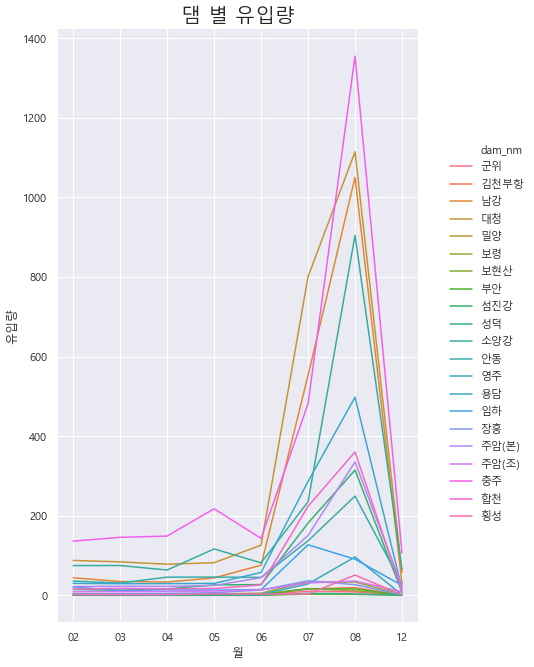

In [25]:
g = sns.relplot(data=mean_df, x="month", y="inflow_qy", hue="dam_nm", kind="line")
g.fig.set_figwidth(8)
g.fig.set_figheight(10)
plt.xlabel('월')
plt.ylabel('유입량')
plt.title('댐 별 유입량', fontsize=20)

Text(0.5, 1.0, '댐 별 방류량')

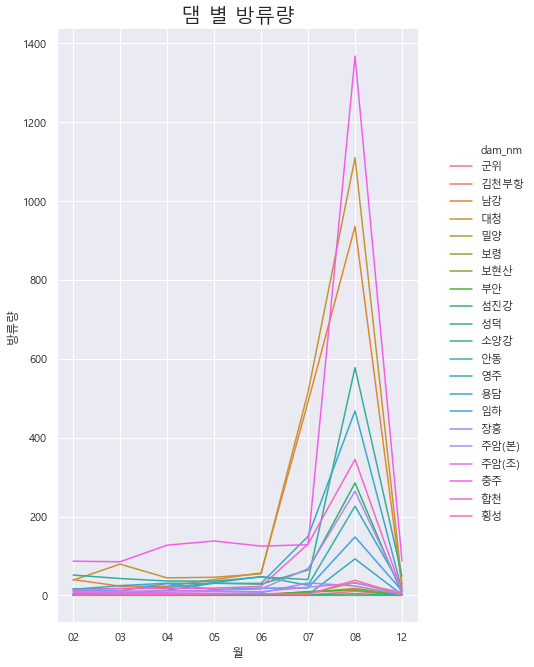

In [26]:
g = sns.relplot(data=mean_df, x="month", y="tot_dcwtr_qy", hue="dam_nm", kind="line")
g.fig.set_figwidth(8)
g.fig.set_figheight(10)
plt.xlabel('월')
plt.ylabel('방류량')
plt.title('댐 별 방류량', fontsize=20)

Text(0.5, 1.0, '댐 별 저수량')

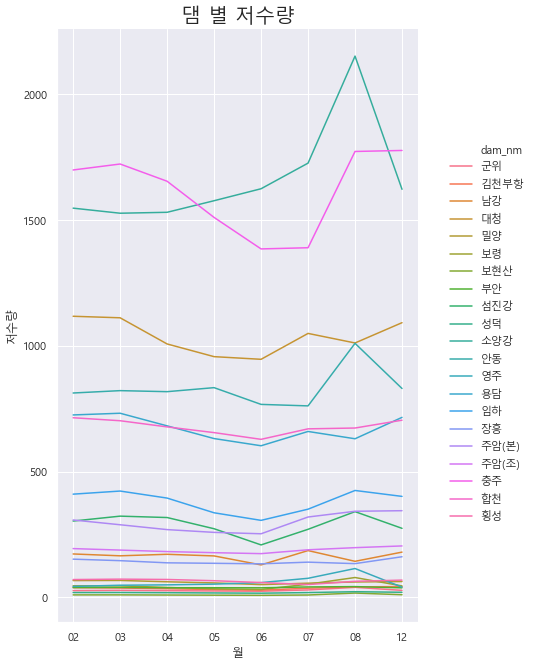

In [27]:
g = sns.relplot(data=mean_df, x="month", y="rsvwt_qy", hue="dam_nm", kind="line")
g.fig.set_figwidth(8)
g.fig.set_figheight(10)
plt.xlabel('월')
plt.ylabel('저수량')
plt.title('댐 별 저수량', fontsize=20)

Text(0.5, 1.0, '댐 별 저수율')

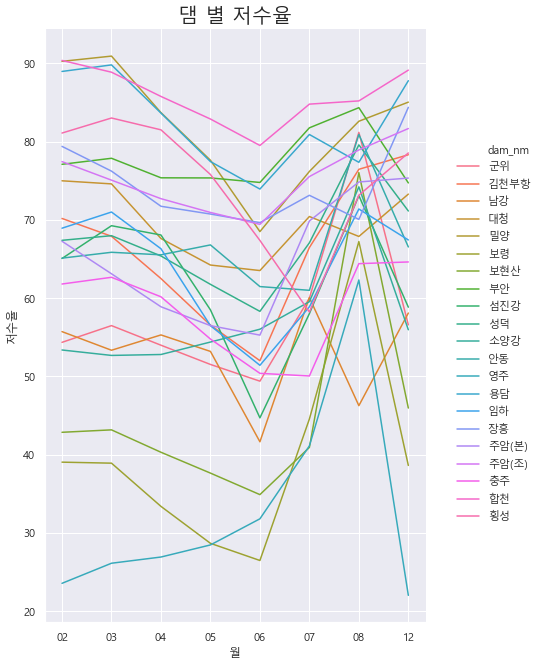

In [28]:
g = sns.relplot(data=mean_df, x="month", y="dam_rsvwt_rt", hue="dam_nm", kind="line")
g.fig.set_figwidth(8)
g.fig.set_figheight(10)
plt.xlabel('월')
plt.ylabel('저수율')
plt.title('댐 별 저수율', fontsize=20)

In [29]:
mean_df = df.groupby(by=["month"]).agg('mean').reset_index()
mean_df['month'] = mean_df['month'].apply(lambda x: float(x))
mean_df['month']

0     2.0
1     3.0
2     4.0
3     5.0
4     6.0
5     7.0
6     8.0
7    12.0
Name: month, dtype: float64

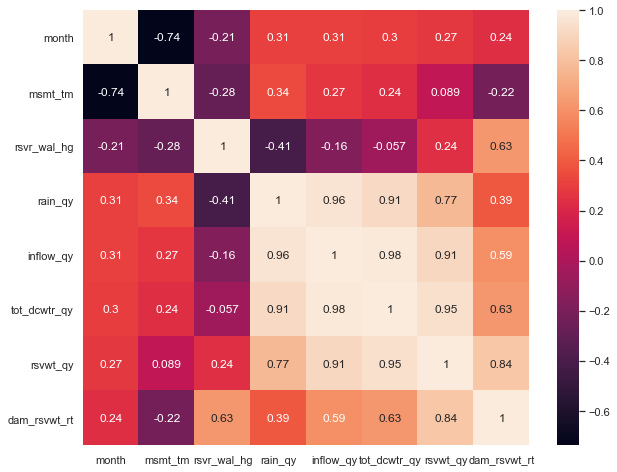

In [30]:
plt.figure(figsize=(10,8))
plt.rc('font', family='sans-serif')
sns.heatmap(mean_df.corr(),annot=True)

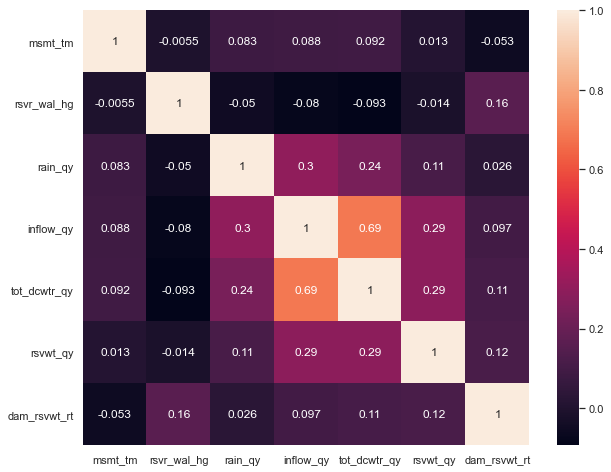

In [31]:
plt.figure(figsize=(10,8))
plt.rc('font', family='sans-serif')
sns.heatmap(df.corr(),annot=True)

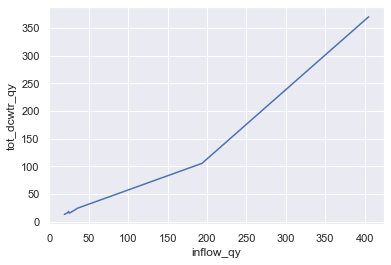

In [32]:
sns.lineplot(data=mean_df,x='inflow_qy',y='tot_dcwtr_qy')

In [33]:
mean_df = df.groupby(by=["month",'dam_nm']).agg('mean').reset_index()
mean_df

,month,dam_nm,msmt_tm,rsvr_wal_hg,rain_qy,inflow_qy,tot_dcwtr_qy,rsvwt_qy,dam_rsvwt_rt
0,02,군위,2.020022e+11,194.578911,0.035383,1.491749,0.727476,26.464519,54.348055
1,02,김천부항,2.020022e+11,190.510625,0.055875,1.920184,1.703704,38.105509,70.183112
2,02,남강,2.020022e+11,40.634433,0.149407,44.392900,40.328762,172.289360,55.716271
3,02,대청,2.020022e+11,75.666366,0.140774,87.961758,38.909284,1117.570740,74.996841
4,02,밀양,2.020022e+11,205.481313,0.073090,2.801670,1.628288,66.428242,90.265921
...,...,...,...,...,...,...,...,...,...
163,12,주암(본),2.019122e+11,105.689308,0.055573,22.762767,11.319899,344.310174,75.346322
164,12,주암(조),2.019122e+11,105.717781,0.022095,9.222157,8.154007,204.175625,81.677067
165,12,충주,2.019122e+11,135.224975,0.067348,106.916355,87.523514,1776.993686,64.622468
166,12,합천,2.019122e+11,175.183861,0.027738,11.222170,10.761609,704.223385,89.144483


Text(0, 0.5, '방류량')

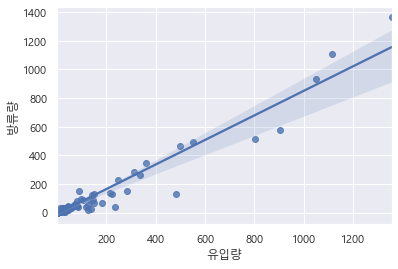

In [34]:
plt.rc('font', family='Malgun Gothic')
sns.regplot(data=mean_df,x='inflow_qy',y='tot_dcwtr_qy')
plt.xlabel('유입량')
plt.ylabel('방류량')

Text(0, 0.5, '유입량')

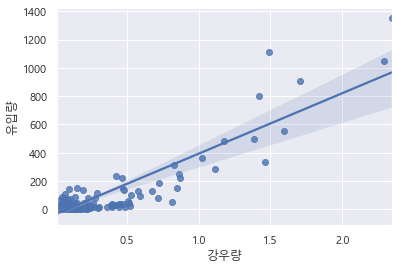

In [35]:
sns.regplot(data=mean_df,x='rain_qy',y='inflow_qy')
plt.xlabel('강우량')
plt.ylabel('유입량')

Text(0, 0.5, '저수량')

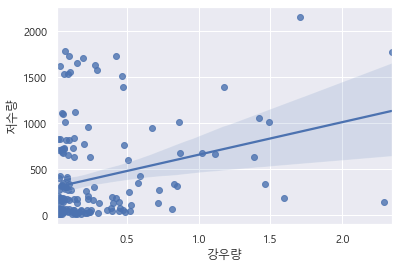

In [36]:
sns.regplot(data=mean_df,x='rain_qy',y='rsvwt_qy')
plt.xlabel('강우량')
plt.ylabel('저수량')

Text(0, 0.5, '저수율')

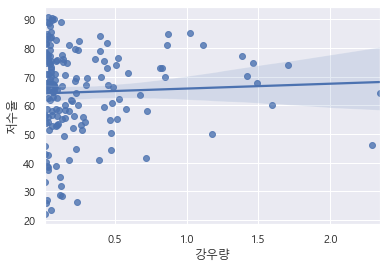

In [37]:
sns.regplot(data=mean_df,x='rain_qy',y='dam_rsvwt_rt')
plt.xlabel('강우량')
plt.ylabel('저수율')

Text(0, 0.5, '저수위')

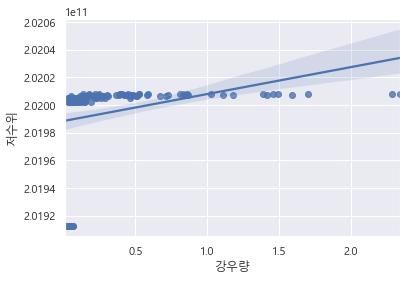

In [38]:
sns.regplot(data=mean_df,x='rain_qy',y='msmt_tm')
plt.xlabel('강우량')
plt.ylabel('저수위')

## 지역 컬럼 추가

In [39]:
dam_list = df['dam_nm'].unique()
dam_list

array(['주암(본)', '군위', '충주', '밀양', '대청', '횡성', '남강', '합천', '섬진강', '김천부항',
       '보현산', '부안', '안동', '보령', '장흥', '성덕', '임하', '용담', '주암(조)', '영주',
       '소양강'], dtype=object)

In [40]:
d = {
    '주암(본)':'전라남도',
    '군위': '경상북도',
    '충주': '충청북도',
    '밀양':'경상남도',
    '대청':'대전광역시',
    '횡성':'강원도 ',
    '남강':'경상남도',
    '합천':'경상남도',
    '섬진강':'전라북도',
    '김천부항':'경상북도',
    '보현산':'경상북도',
    '부안':'전라북도',
    '안동':'경상북도',
    '보령':'충청남도',
    '장흥':'전라남도',
    '성덕':'경상북도',
    '임하':'경상북도',
    '용담':'전라북도',
    '주암(조)':'전라남도',
    '영주':'경상북도',
    '소양강':'강원도'
}

In [41]:
df['region'] = df['dam_nm'].apply(lambda x:d[x])
df

,dam_nm,msmt_tm,rsvr_wal_hg,rain_qy,inflow_qy,tot_dcwtr_qy,rsvwt_qy,dam_rsvwt_rt,month,region
0,주암(본),201912092400,105.90,0.0,11.288,11.180,349.339,76.4,12,전라남도
1,주암(본),201912092400,105.90,0.0,11.289,11.289,349.339,76.4,12,전라남도
2,주암(본),201912092350,105.90,0.0,11.602,11.210,349.339,76.4,12,전라남도
3,주암(본),201912092340,105.90,0.0,11.919,11.474,349.339,76.4,12,전라남도
4,주암(본),201912092330,105.90,0.0,12.146,12.123,349.339,76.4,12,전라남도
...,...,...,...,...,...,...,...,...,...,...
1042885,소양강,202008312130,186.08,0.0,209.857,210.063,2049.735,70.7,08,강원도
1042886,소양강,202008312400,186.06,0.0,209.720,209.650,2048.651,70.6,08,강원도
1042887,소양강,202008312400,186.06,0.0,209.720,209.720,2048.651,70.6,08,강원도
1042888,소양강,202008312350,186.06,0.0,0.000,209.755,2048.651,70.6,08,강원도


In [42]:
mean_df = df.groupby(by=["region","month"]).agg('mean').reset_index()
mean_df

,region,month,msmt_tm,rsvr_wal_hg,rain_qy,inflow_qy,tot_dcwtr_qy,rsvwt_qy,dam_rsvwt_rt
0,강원도,02,2.020022e+11,175.895934,0.104575,75.013883,51.784965,1547.532443,53.369262
1,강원도,03,2.020032e+11,175.439003,0.058402,75.229648,42.963744,1527.369186,52.675735
2,강원도,04,2.020042e+11,175.523463,0.090909,63.879295,36.643817,1531.068310,52.792910
3,강원도,05,2.020052e+11,176.549969,0.288202,116.899774,36.242154,1577.106614,54.385470
4,강원도,06,2.020062e+11,177.611270,0.276281,82.016479,46.872580,1624.722699,56.025409
...,...,...,...,...,...,...,...,...,...
67,충청북도,05,2.020052e+11,131.527112,0.464286,217.666917,138.167889,1510.635783,54.767285
68,충청북도,06,2.020062e+11,129.739833,0.472484,143.490263,125.129041,1385.409174,50.384845
69,충청북도,07,2.020072e+11,129.512547,1.177897,481.384793,128.610368,1390.114846,50.048116
70,충청북도,08,2.020081e+11,135.001673,2.344082,1354.467348,1367.514202,1772.961022,64.404935


Text(0.5, 1.0, '지역 별 저수위')

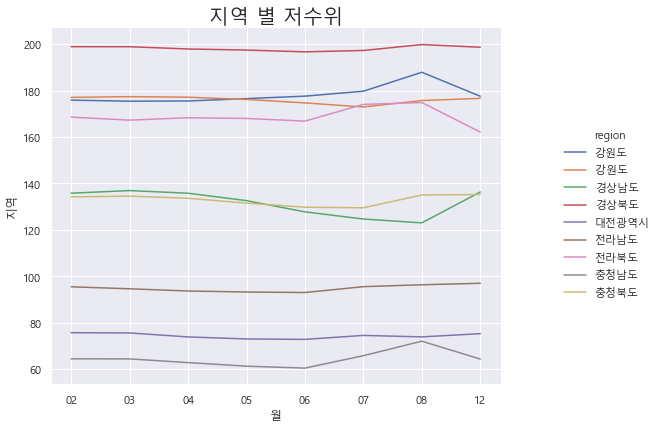

In [43]:
g = sns.relplot(data=mean_df, x="month", y="rsvr_wal_hg", hue="region", kind="line")
g.fig.set_figwidth(10)
g.fig.set_figheight(6)
plt.xlabel('월')
plt.ylabel('지역')
plt.title('지역 별 저수위', fontsize=20)

Text(0.5, 1.0, '지역 별 강우량')

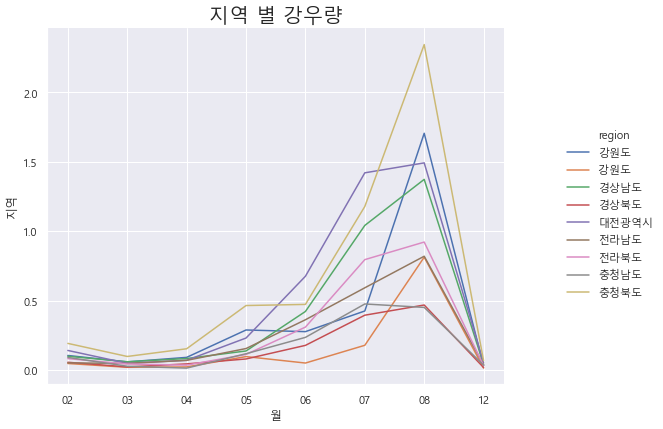

In [44]:
g = sns.relplot(data=mean_df, x="month", y="rain_qy", hue="region", kind="line")
g.fig.set_figwidth(10)
g.fig.set_figheight(6)
plt.xlabel('월')
plt.ylabel('지역')
plt.title('지역 별 강우량', fontsize=20)

Text(0.5, 1.0, '지역 별 유입량')

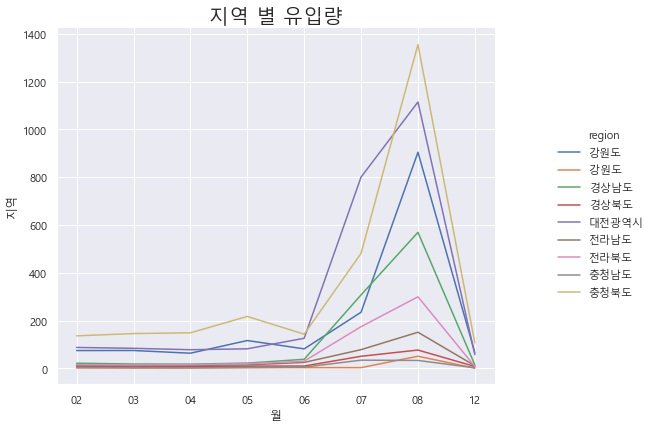

In [45]:
g = sns.relplot(data=mean_df, x="month", y="inflow_qy", hue="region", kind="line")
g.fig.set_figwidth(10)
g.fig.set_figheight(6)
plt.xlabel('월')
plt.ylabel('지역')
plt.title('지역 별 유입량', fontsize=20)

Text(0.5, 1.0, '지역 별 방류량')

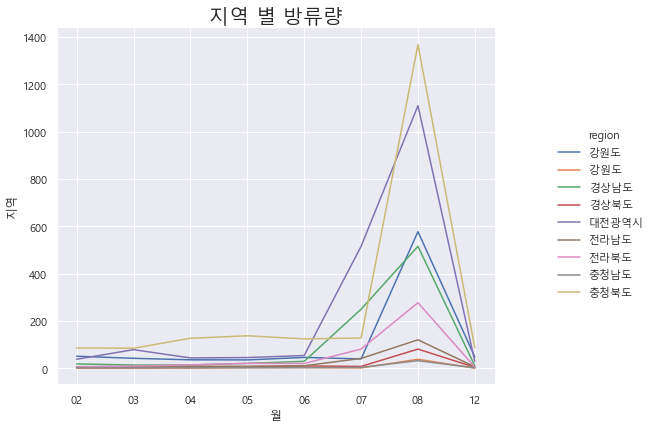

In [46]:
g = sns.relplot(data=mean_df, x="month", y="tot_dcwtr_qy", hue="region", kind="line")
g.fig.set_figwidth(10)
g.fig.set_figheight(6)
plt.xlabel('월')
plt.ylabel('지역')
plt.title('지역 별 방류량', fontsize=20)

Text(0.5, 1.0, '지역 별 저수량')

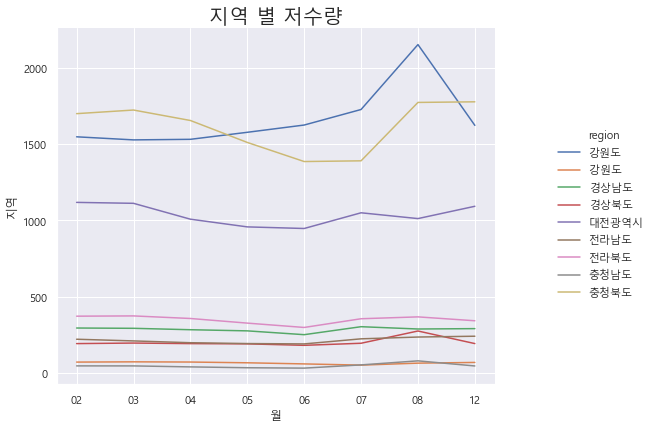

In [47]:
g = sns.relplot(data=mean_df, x="month", y="rsvwt_qy", hue="region", kind="line")
g.fig.set_figwidth(10)
g.fig.set_figheight(6)
plt.xlabel('월')
plt.ylabel('지역')
plt.title('지역 별 저수량', fontsize=20)

Text(0.5, 1.0, '지역 별 저수율')

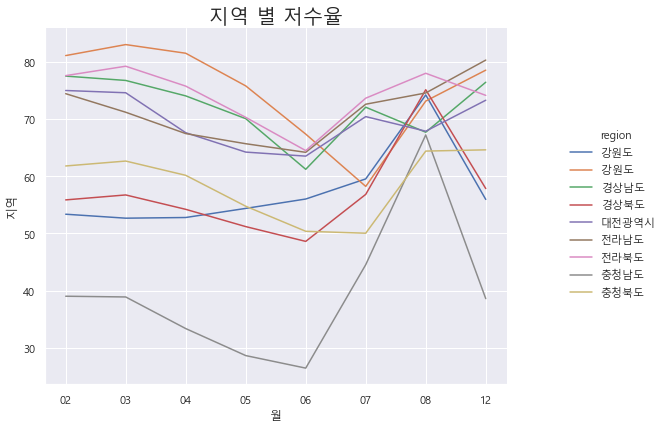

In [48]:
g = sns.relplot(data=mean_df, x="month", y="dam_rsvwt_rt", hue="region", kind="line")
g.fig.set_figwidth(10)
g.fig.set_figheight(6)
plt.xlabel('월')
plt.ylabel('지역')
plt.title('지역 별 저수율', fontsize=20)

In [49]:
df

,dam_nm,msmt_tm,rsvr_wal_hg,rain_qy,inflow_qy,tot_dcwtr_qy,rsvwt_qy,dam_rsvwt_rt,month,region
0,주암(본),201912092400,105.90,0.0,11.288,11.180,349.339,76.4,12,전라남도
1,주암(본),201912092400,105.90,0.0,11.289,11.289,349.339,76.4,12,전라남도
2,주암(본),201912092350,105.90,0.0,11.602,11.210,349.339,76.4,12,전라남도
3,주암(본),201912092340,105.90,0.0,11.919,11.474,349.339,76.4,12,전라남도
4,주암(본),201912092330,105.90,0.0,12.146,12.123,349.339,76.4,12,전라남도
...,...,...,...,...,...,...,...,...,...,...
1042885,소양강,202008312130,186.08,0.0,209.857,210.063,2049.735,70.7,08,강원도
1042886,소양강,202008312400,186.06,0.0,209.720,209.650,2048.651,70.6,08,강원도
1042887,소양강,202008312400,186.06,0.0,209.720,209.720,2048.651,70.6,08,강원도
1042888,소양강,202008312350,186.06,0.0,0.000,209.755,2048.651,70.6,08,강원도


In [50]:
mean_df = df.groupby(by=["region","dam_nm"]).agg('mean').reset_index()
mean_df

,region,dam_nm,msmt_tm,rsvr_wal_hg,rain_qy,inflow_qy,tot_dcwtr_qy,rsvwt_qy,dam_rsvwt_rt
0,강원도,소양강,2.019958e+11,179.294938,0.511357,274.476108,155.608720,1714.960716,59.140791
1,강원도,횡성,2.019939e+11,175.929318,0.176512,10.070159,7.951893,64.785003,74.556093
2,경상남도,남강,2.019963e+11,40.233281,0.862030,317.161529,279.018228,162.867354,52.677921
3,경상남도,밀양,2.019941e+11,202.083783,0.139421,5.875273,4.922483,60.074283,81.627287
4,경상남도,합천,2.019959e+11,173.956741,0.382015,111.032883,91.959089,676.035087,85.578183
5,경상북도,군위,2.019939e+11,195.427673,0.089427,3.440960,2.183600,28.341307,58.200934
6,경상북도,김천부항,2.019942e+11,189.406045,0.191542,6.439961,4.803271,36.045829,66.387702
7,경상북도,보현산,2.019937e+11,226.353033,0.070808,1.049890,0.348502,10.025446,45.349490
8,경상북도,성덕,2.019946e+11,357.636149,0.111182,1.809247,1.198633,18.780219,67.317378
9,경상북도,안동,2.019954e+11,152.097238,0.283187,89.083613,60.170265,838.564779,67.201210


Text(0.5, 1.0, '댐 지역 분포')

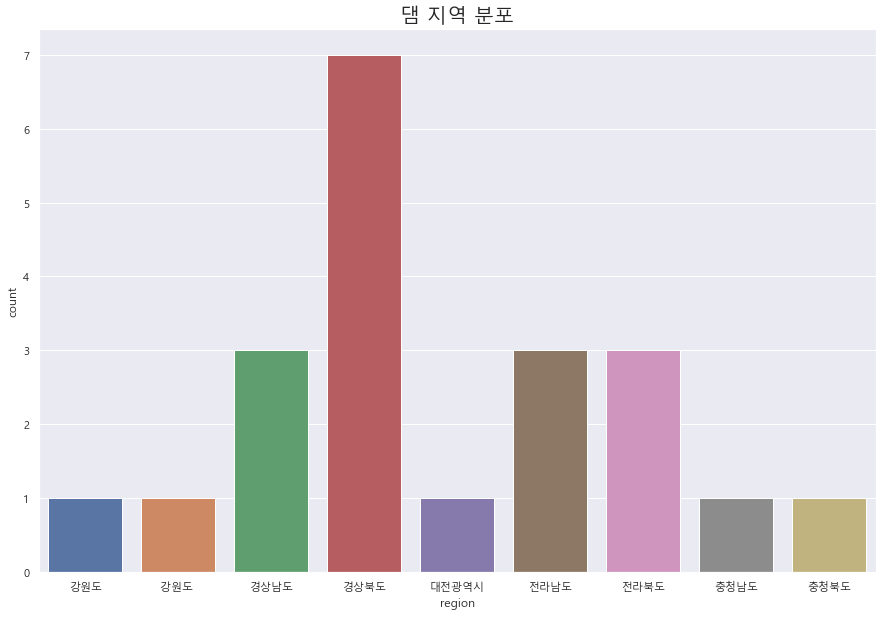

In [51]:
plt.figure(figsize=(15,10))
sns.countplot(x="region", data=mean_df)
plt.title('댐 지역 분포', fontsize=20)

Text(0.5, 1.0, '지역 별 평균 저수위')

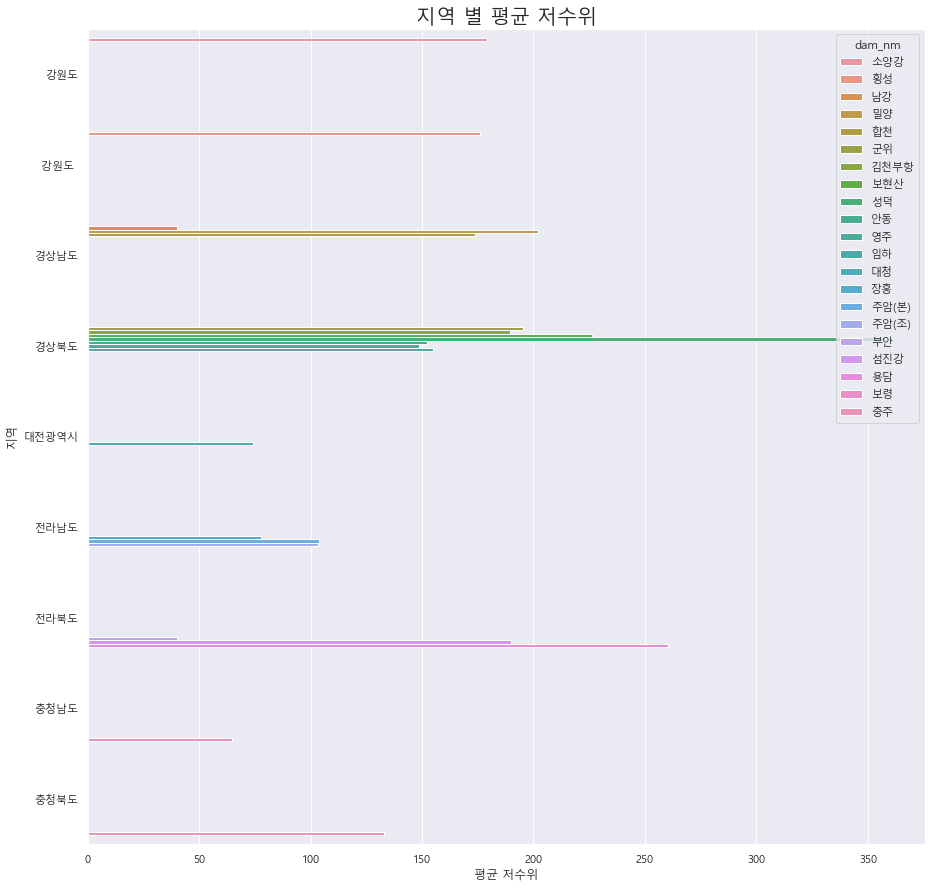

In [52]:
plt.figure(figsize=(15,15))
ax = sns.barplot(x='rsvr_wal_hg', y='region', data=mean_df,hue='dam_nm')
plt.xlabel('평균 저수위')
plt.ylabel('지역')
plt.title('지역 별 평균 저수위', fontsize=20)

Text(0.5, 1.0, '지역 별 평균 강우량')

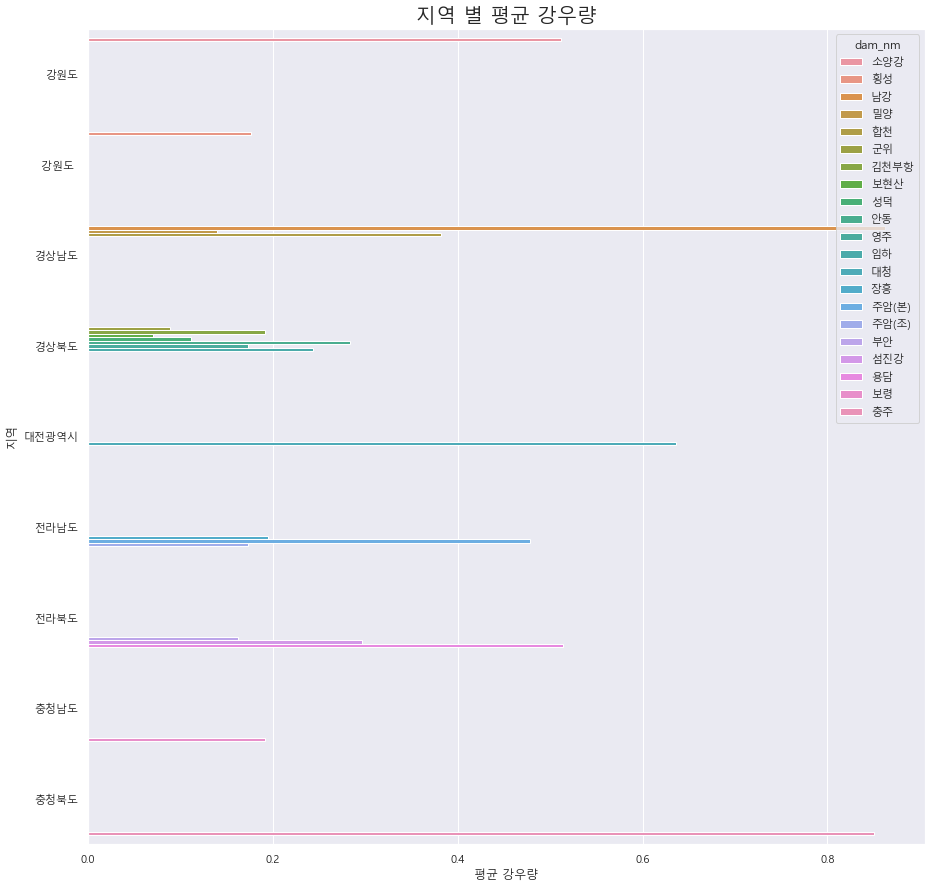

In [53]:
plt.figure(figsize=(15,15))
ax = sns.barplot(x='rain_qy', y='region', data=mean_df,hue='dam_nm')
plt.xlabel('평균 강우량')
plt.ylabel('지역')
plt.title('지역 별 평균 강우량', fontsize=20)

Text(0.5, 1.0, '지역 별 평균 유입량')

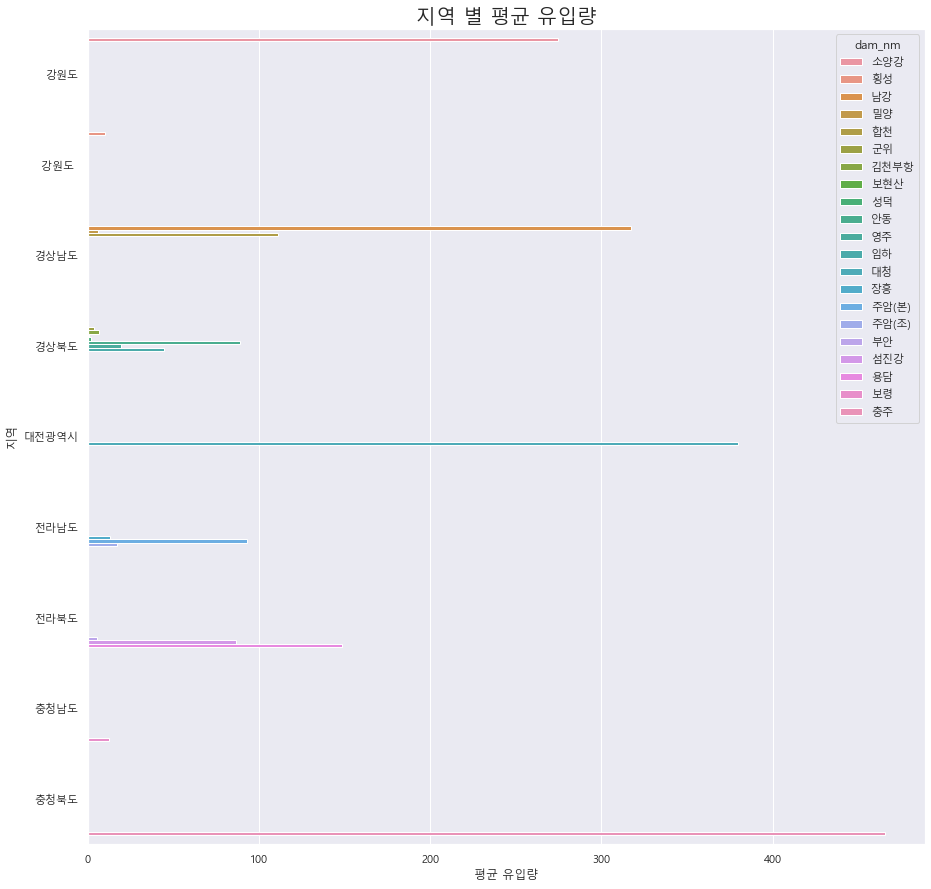

In [54]:
plt.figure(figsize=(15,15))
ax = sns.barplot(x='inflow_qy', y='region', data=mean_df,hue='dam_nm')
plt.xlabel('평균 유입량')
plt.ylabel('지역')
plt.title('지역 별 평균 유입량', fontsize=20)

Text(0.5, 1.0, '지역 별 평균 방류량')

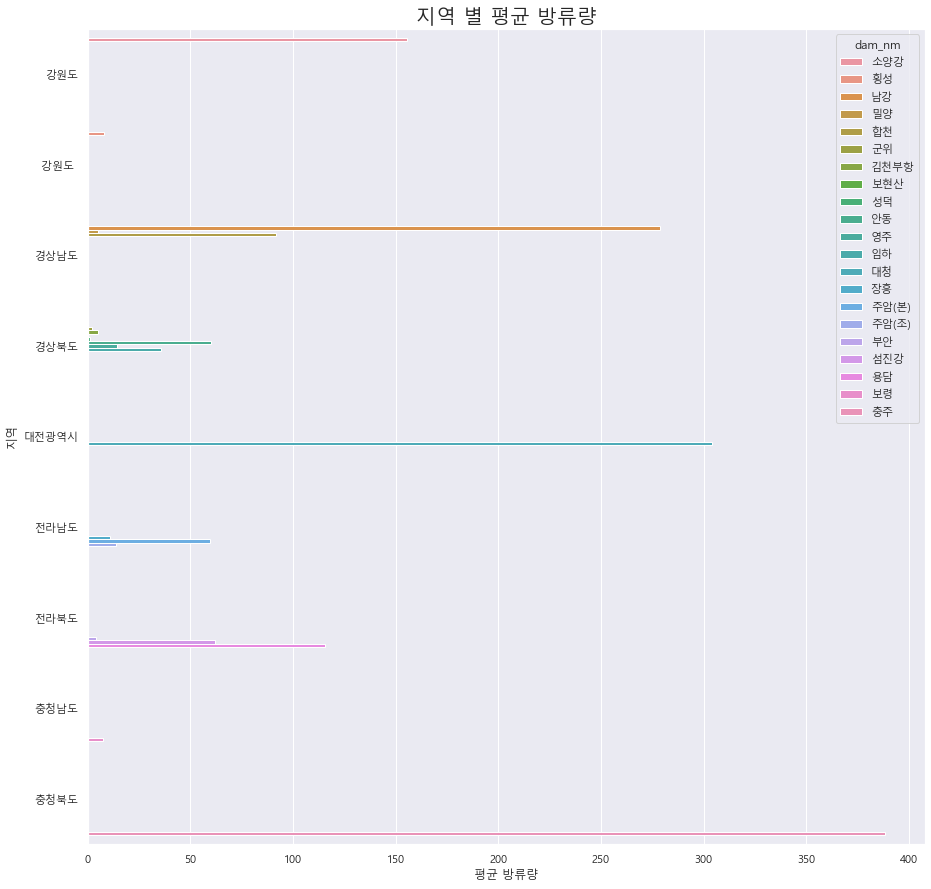

In [55]:
plt.figure(figsize=(15,15))
ax = sns.barplot(x='tot_dcwtr_qy', y='region', data=mean_df,hue='dam_nm')
plt.xlabel('평균 방류량')
plt.ylabel('지역')
plt.title('지역 별 평균 방류량', fontsize=20)

Text(0.5, 1.0, '지역 별 평균 저수량')

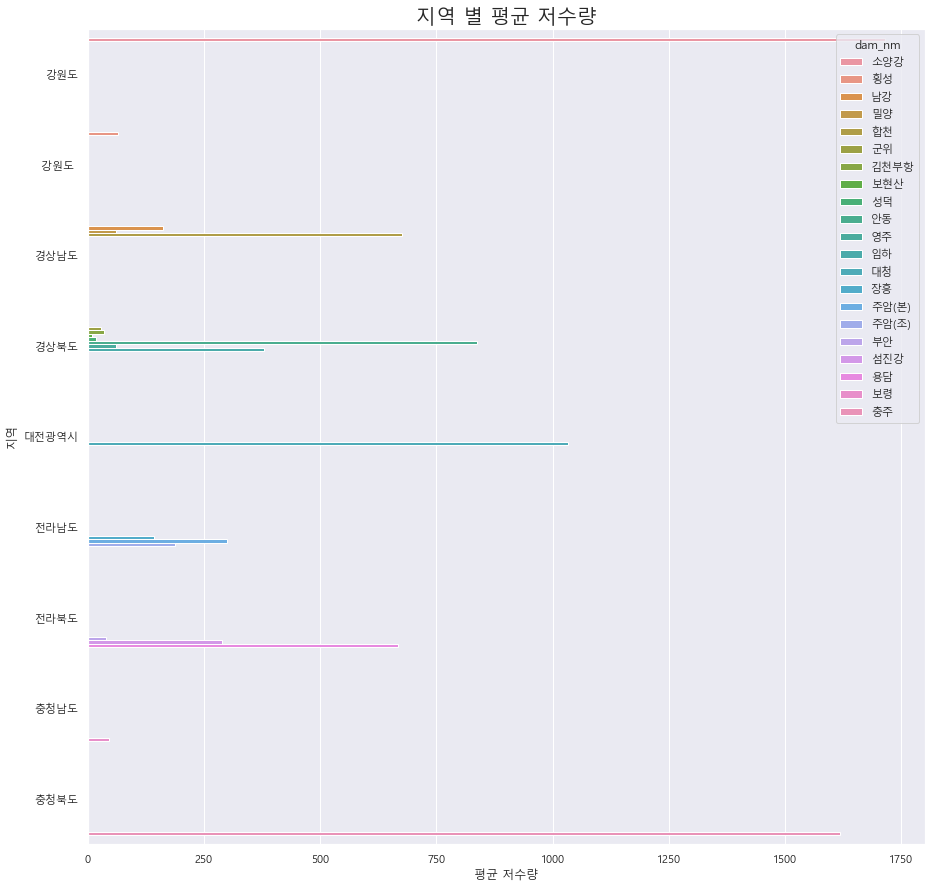

In [56]:
plt.figure(figsize=(15,15))
ax = sns.barplot(x='rsvwt_qy', y='region', data=mean_df,hue='dam_nm')
plt.xlabel('평균 저수량')
plt.ylabel('지역')
plt.title('지역 별 평균 저수량', fontsize=20)

Text(0.5, 1.0, '지역 별 평균 저수율')

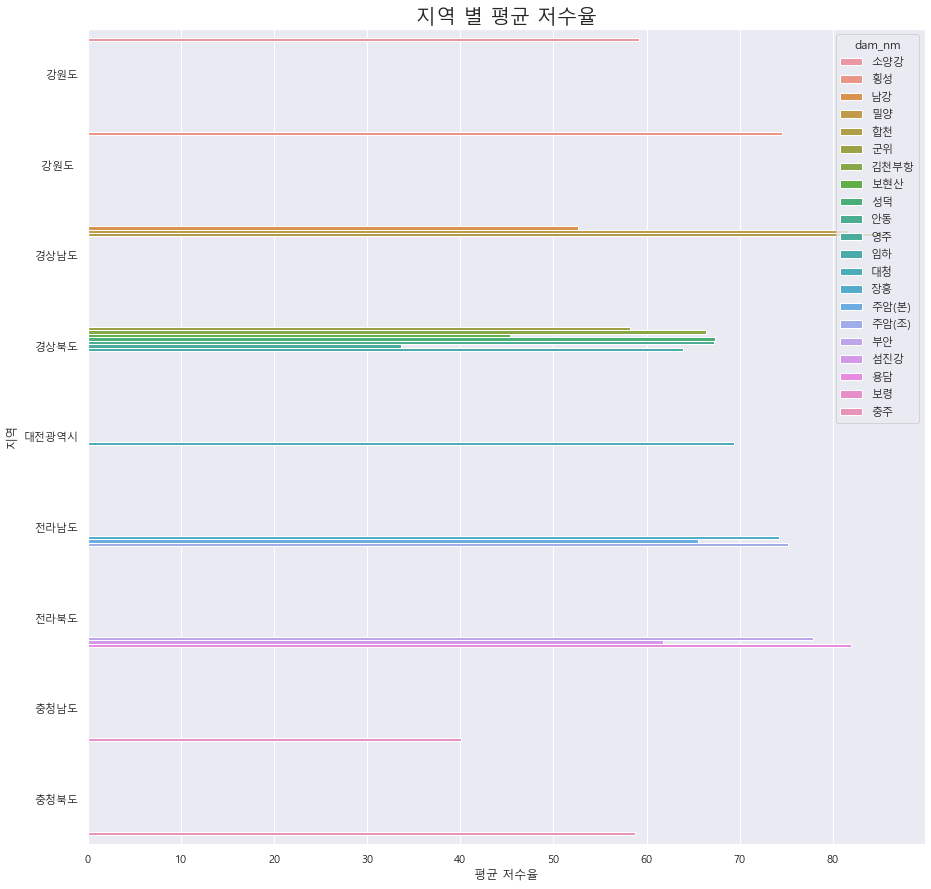

In [57]:
plt.figure(figsize=(15,15))
ax = sns.barplot(x='dam_rsvwt_rt', y='region', data=mean_df,hue='dam_nm')
plt.xlabel('평균 저수율')
plt.ylabel('지역')
plt.title('지역 별 평균 저수율', fontsize=20)

In [58]:
df

,dam_nm,msmt_tm,rsvr_wal_hg,rain_qy,inflow_qy,tot_dcwtr_qy,rsvwt_qy,dam_rsvwt_rt,month,region
0,주암(본),201912092400,105.90,0.0,11.288,11.180,349.339,76.4,12,전라남도
1,주암(본),201912092400,105.90,0.0,11.289,11.289,349.339,76.4,12,전라남도
2,주암(본),201912092350,105.90,0.0,11.602,11.210,349.339,76.4,12,전라남도
3,주암(본),201912092340,105.90,0.0,11.919,11.474,349.339,76.4,12,전라남도
4,주암(본),201912092330,105.90,0.0,12.146,12.123,349.339,76.4,12,전라남도
...,...,...,...,...,...,...,...,...,...,...
1042885,소양강,202008312130,186.08,0.0,209.857,210.063,2049.735,70.7,08,강원도
1042886,소양강,202008312400,186.06,0.0,209.720,209.650,2048.651,70.6,08,강원도
1042887,소양강,202008312400,186.06,0.0,209.720,209.720,2048.651,70.6,08,강원도
1042888,소양강,202008312350,186.06,0.0,0.000,209.755,2048.651,70.6,08,강원도
